# Proyecto Módulo 2 Volumen de un terreno

## Integrantes:
## Antonio Ortegón
## René González

### Problema:
### Calculo de volúmenes de excavación en un terreno irregular

Para poder resolver esto se debe hará con la integración de Montecarlo, ya que, lo que se busca obtener es el área para excavar, sin embargo, primero se debe de cumplir una serie de pasos que se obtienen en la investigación de campo. Como lo son:

- Modelo digital del terreno (MDT): este es un modelo digital que se genera a partir de datos tomados mediante topógrafos, es decir, los datos que se obtienen mediante GPS, ya sea con Estaciones Totales, Drones, o escáner LiDAR.

- Definir el área de interés: para poder hacer esto se debe conocer las fronteras de nuestro terreno y los niveles, sin embargo, esto se puede hacer fácilmente en AUTOCAD, no obstante, nosotros lo haremos de otra forma.

- Cálculo de volúmenes: durante la generación del volumen, se buscará evaluar si cada punto está a dentro del área a evaluar. Esto se hace comparando la altura del terreno con la ubicación deseada. En caso de que el punto este fuera de la superficie, pero en la altura de la excavación se tomara en cuenta para el volumen a excavar.

- Utilización del método Montecarlo: el método Montecarlo se utiliza la proporción de los puntos que caen dentro del volumen de la excavación con el fin de compararlos y determinar cuales están adentro y cuáles no.


### Objetivos:
- Obtener un cálculo preciso del volumen a excavar.

- Definir el área de interés.

- Comparar las cotas del terreno con la altura de excavación.

### Objetivos específicos:

- Utilizar modelos de topografía para poder obtener los datos para luego procesarlos y construir un MDT.

- Mediante Montecarlo evaluar los puntos y generar el área a excavar.



### Diagrama

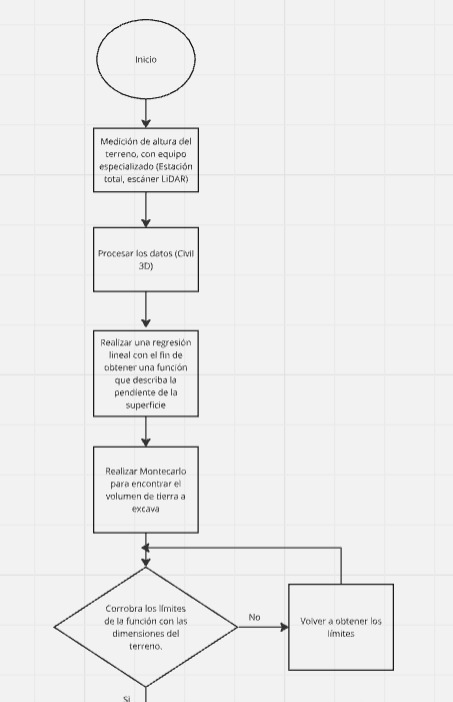

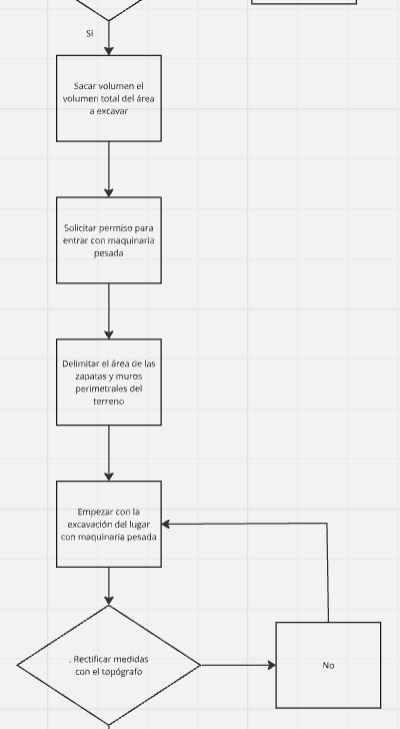

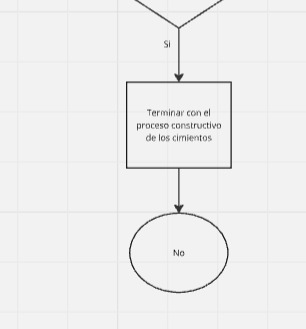

### Modelo

$V≈A×(Pdentro/Ptotal)$

### Problemática:

Nuestro cliente desea construir su casa sobre en un terreno irregular, para ello nosotros como constructora hemos decidido realizar una plataforma que sirva para nivelar el terreno, no obstante, para poder lograr esto se debe de excavar una cantidad del terreno con el fin de poder regularizar lo más que se pueda el terreno. Sin embargo, las medidas que tiene el cliente de terreno son de 20x5m y el desnivel del terreno es de 15m y 30m. No obstante, tenemos como referencia una casa que se encuentra a sobre nivel del punto más bajo a 10m


### Función que describe el problema

$ 37.27 x - 1.82  y - 15.45 $



### Montecarlo:

In [ ]:
def montecarlo3D(region, ax, bx, ay, by, az, bz, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    z = np.random.uniform(az, bz, n)
    V = (bx - ax) * (by - ay) * (bz - az)
    dentro = np.array([1 if region(px, py, pz) == 'blue' else 0 for px, py, pz in zip(x, y, z)])
    volumen = V * np.mean(dentro)
    return volumen

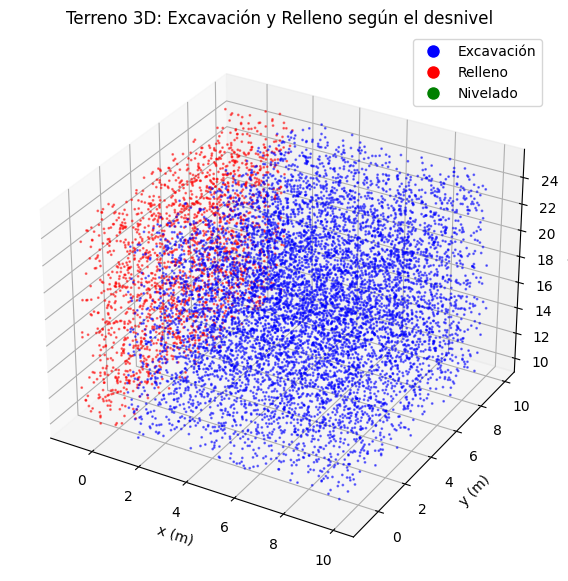

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
def montecarlo3D(region, ax, bx, ay, by, az, bz, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    z = np.random.uniform(az, bz, n)
    V = (bx - ax) * (by - ay) * (bz - az)
    dentro = np.array([1 if region(px, py, pz) == 'blue' else 0 for px, py, pz in zip(x, y, z)])
    volumen = V * np.mean(dentro)
    return volumen

def f(x, y):
    return 37.273 * x - 1.818 * y - 19.091
def region(x, y, z):
    val = f(x, y)
    if z < val:
        return 'blue'  # Excavación
    elif z > val:
        return 'red'   # Relleno
    else:
        return 'green' # Nivelado
ax=-1
bx=10
ay=-1
by=10
az=10
refe=25
n = 10000

x = np.random.uniform(ax, bx, n)
y = np.random.uniform(ay, by, n)
z = np.random.uniform(az, refe, n)
colors = [region(px, py, pz) for px, py, pz in zip(x, y, z)]

fig = plt.figure(figsize=(10, 7))
ax3d = fig.add_subplot(111, projection='3d')
sc = ax3d.scatter(x, y, z, c=colors, s=1, alpha=0.5)

ax3d.set_title("Terreno 3D: Excavación y Relleno según el desnivel")
ax3d.set_xlabel("x (m)")
ax3d.set_ylabel("y (m)")
ax3d.set_zlabel("z (m)")

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Excavación', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Relleno', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nivelado', markerfacecolor='green', markersize=10)
]
ax3d.legend(handles=legend_elements, loc='upper right')
plt.show()



In [ ]:

AD = montecarlo3D(region, ax, bx, ay, by, az, refe, n)
V = (bx - ax) * (by - ay) * (refe - az)
Crel = np.sqrt(np.abs((1 - AD / V) / (AD / V)))
Erel = np.log10(Crel) - np.log10(10)
tabla = pd.DataFrame(columns=['Aproximación', "Volumen", "Convergencia", 'Error'])
tabla.loc["Excavación"] = [AD, V, Crel, Erel]
tabla

,Aproximación,Volumen,Convergencia,Error
Excavación,1458.7155,1815.0,0.494212,-1.306087


### Volumen total

El volumen total del proyecto entre lo que es excavar y de relleno es de $1815m^3$

### Conclusiones

Lo que nos quedamos de este proyecto, es que, puede haber una aplicación muy interesante para la ingenería civil usando temas vistos en clase, como es el uso de montecarlo.

Pese a que se usaron datos falsos, debido a que no se tienen las herramientas necesarias para obtener los datos reales de la superficie de interese, resulto muy interesante ver el cómo mediante el uso de funciones que se aproximen a la realidad y un poco de imaginación se puede obtener en menos de 30 minutos algo, que en otros programas tardariamos 2 horas en pasar datos. Con esto queremos decir que sí se lograron los objetivos que eran demostrar el uso de esto en la ingenería civil y poder generar los puntos necesarios para poder obtener el volumen del área necesaria a excavar.

Referencias:

Dialnet. (n.d.). Estudio de la viabilidad técnica y económica de los modelos digitales del terreno en la ingeniería civil. Recuperado de https://dialnet.unirioja.es/servlet/tesis?codigo=236604

Calderon G, C. (2020). Cálculo de volumen por capas horizontales. Autodesk Forums. Recuperado de https://forums.autodesk.com/t5/civil-3d-espanol/calculo-de-volumen-por-capas-horizontales/td-p/8906616

Sig de Letras. (2016). ¿Qué es un modelo digital de terreno? Recuperado de https://sigdeletras.com/2016/que-es-un-modelo-digital-de-terreno/

Amazon Web Services. (n.d.). Simulación de Monte Carlo. Recuperado de https://aws.amazon.com/es/what-is/monte-carlo-simulation/#:~:text=Las%20simulaciones%20de%20Monte%20Carlo%20son%20una%20t%C3%A9cnica%20matem%C3%A1tica%20que,de%20una%20elecci%C3%B3n%20de%20acci%C3%B3n
